<a href="https://colab.research.google.com/github/Birjesh786/Machine-Learning-Models/blob/main/Language_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Language Detection Model**
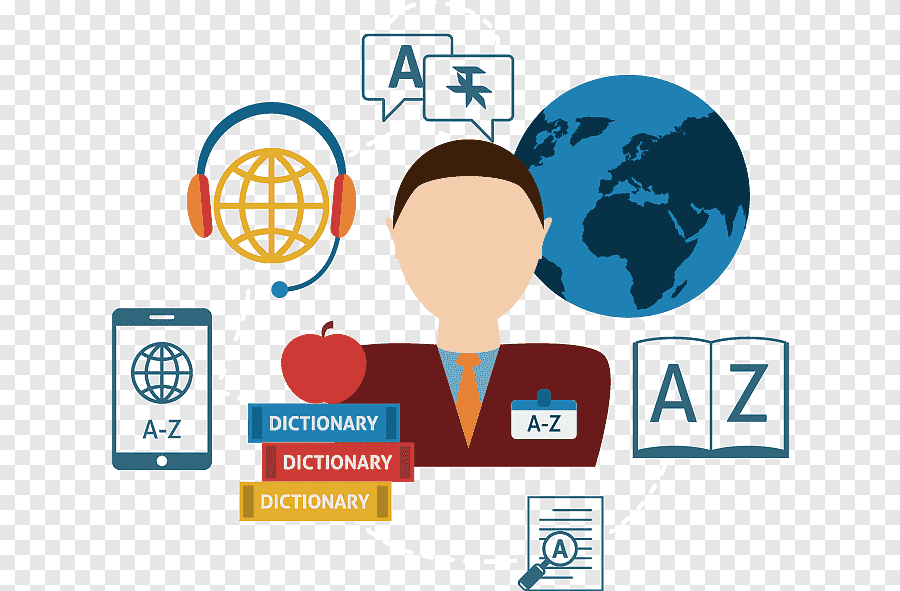

### Install requirments libraries

In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

## Load dataset

In [24]:
# Load the language detection dataset
lan_data = pd.read_csv("Language Detection.csv")

lan_data

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


## Show the language our dataset

In [23]:
lan_data['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

## Plot the language count

In [25]:
import plotly.express as px

# Get the language value counts
language_counts = lan_data['Language'].value_counts()

# Create a bar plot using Plotly Express
fig = px.bar(language_counts, x=language_counts.index, y=language_counts.values,
             color=language_counts.index, labels={'x': 'Language', 'y': 'Count'})

# Customize the layout
fig.update_layout(title='Language Distribution',
                  xaxis_title='Language',
                  yaxis_title='Count',
                  showlegend=False)

# Show the plot
fig.show()

## Split data

In [26]:
# Get the text and language columns
text = lan_data["Text"]
language = lan_data["Language"]

## Create a model Pipiline

In [11]:
# Create a pipeline with TfidfVectorizer and MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Use TfidfVectorizer instead of CountVectorizer
    ('clf', MultinomialNB())
])

## Model performance

In [27]:
# Perform cross-validation to assess model performance
cv_scores = cross_val_score(pipeline, text, language, cv=10)  # 10-fold cross-validation

In [29]:
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.96518375 0.97969052 0.97775629 0.98259188 0.9729207  0.95551257
 0.94003868 0.8857696  0.90029042 0.9767667 ]
Mean CV score: 0.9536521109011892


## Train the pipeline

In [15]:
# Train the pipeline on the entire dataset
pipeline.fit(text, language)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

## Now predict Language

In [16]:
# Get the user input
user_input = input("Enter a text: ")

# Predict the language of the user input
predicted_language = pipeline.predict([user_input])

# Print the predicted language
print("Predicted language:", predicted_language)

Enter a text: Wie ben je
Predicted language: ['Dutch']
